#  Machine learning

In [4]:
# Data Science Libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast

# model preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [5]:
# Import the data - Movies Metadata
df = pd.read_csv("moviedata/movies_final.csv")
df.head()

,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre,production_company,production_country,spoken_language,release_year,release_month,release_dayofweek,release_is_weekend
0,30000000.0,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,Animation,Other,United States of America,English,1995.0,10.0,0.0,False
1,65000000.0,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,Adventure,Columbia Pictures,United States of America,English,1995.0,12.0,4.0,True
2,0.0,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,Romance,Warner Bros.,United States of America,English,1995.0,12.0,4.0,True
3,16000000.0,3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,Comedy,Twentieth Century Fox Film Corporation,United States of America,English,1995.0,12.0,4.0,True
4,0.0,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,Comedy,Other,United States of America,English,1995.0,2.0,4.0,True


In [7]:
df["is_good"] = df.vote_average >6 
df.is_good.value_counts()

True     16444
False    15576
Name: is_good, dtype: int64

In [8]:
# 6 and not 5 
df.vote_average.describe()

count    32020.000000
mean         5.846259
std          1.588432
min          0.000000
25%          5.300000
50%          6.100000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [9]:
#Dumify and drop unused columns
df2 = df.drop(columns=['title', 'vote_average', 'release_date', 'release_dayofweek'])
df2 = pd.get_dummies(df2)

df2.head()

,budget,popularity,revenue,runtime,vote_count,release_year,release_month,release_is_weekend,is_good,genre_Action,...,production_country_United States of America,spoken_language_Chinese,spoken_language_Deutsch,spoken_language_English,spoken_language_Español,spoken_language_Français,spoken_language_Italiano,spoken_language_Japanese,spoken_language_Other,spoken_language_Russian
0,30000000.0,21.946943,373554033.0,81.0,5415.0,1995.0,10.0,False,True,0,...,1,0,0,1,0,0,0,0,0,0
1,65000000.0,17.015539,262797249.0,104.0,2413.0,1995.0,12.0,True,True,0,...,1,0,0,1,0,0,0,0,0,0
2,0.0,11.712900,0.0,101.0,92.0,1995.0,12.0,True,True,0,...,1,0,0,1,0,0,0,0,0,0
3,16000000.0,3.859495,81452156.0,127.0,34.0,1995.0,12.0,True,True,0,...,1,0,0,1,0,0,0,0,0,0
4,0.0,8.387519,76578911.0,106.0,173.0,1995.0,2.0,True,False,0,...,1,0,0,1,0,0,0,0,0,0


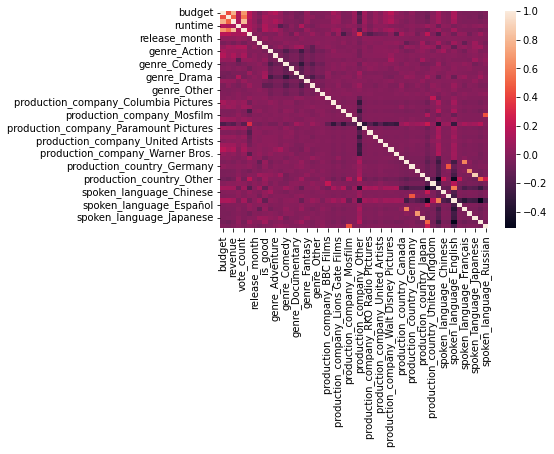

is_good                                        1.000000
genre_Horror                                   0.139270
vote_count                                     0.135638
runtime                                        0.135240
spoken_language_English                        0.131222
production_country_United States of America    0.124880
popularity                                     0.110922
genre_Drama                                    0.108600
revenue                                        0.090448
spoken_language_Other                          0.084997
genre_Documentary                              0.083843
production_country_Other                       0.071780
spoken_language_Japanese                       0.069348
production_country_Japan                       0.063857
production_country_Canada                      0.056165
production_country_France                      0.055107
genre_Action                                   0.053267
spoken_language_Français                       0

In [10]:
corrs = df2.corr()
sns.heatmap(corrs)
plt.show()

abs(corrs["is_good"]).sort_values(ascending=False).head(20)

In [11]:
X = df2.drop("is_good", axis=1).values
y = df2.loc[:, ["is_good"]].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # use stratify for classification models
print(f"{round(len(X_train)/len(X), 3)} : {round(len(X_test)/len(X), 3)}")

0.75 : 0.25


In [12]:
def evaluateModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) # fit
    
    train_preds = model.predict(X_train) # predict
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)
    
    output_train = f"""
    METRICS FOR THE TRAINING SET:
    ----------------------------
    {confusion_matrix(y_train, train_preds)}

    {classification_report(y_train, train_preds)}
    """
    print(output_train)

    #################################################

    output_test = f"""
    METRICS FOR THE TESTING SET:
    ----------------------------
    {confusion_matrix(y_test, test_preds)}

    {classification_report(y_test, test_preds)}
    """
    print(output_test)
    print()
    
    #################################################
    
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

    roc_auc_knn = auc(fpr_knn, tpr_knn)
    print(f"AUC for the Model Test Set: {roc_auc_knn}")

    # make plot
    plt.figure(figsize=(10,6))
    plt.plot(fpr_knn, tpr_knn, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    print("Brier Score:")
    print(sum((y_test - test_proba[:,1])**2))


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[ 2004  9678]
 [ 1807 10526]]

                  precision    recall  f1-score   support

       False       0.53      0.17      0.26     11682
        True       0.52      0.85      0.65     12333

    accuracy                           0.52     24015
   macro avg       0.52      0.51      0.45     24015
weighted avg       0.52      0.52      0.46     24015

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[ 668 3226]
 [ 599 3512]]

                  precision    recall  f1-score   support

       False       0.53      0.17      0.26      3894
        True       0.52      0.85      0.65      4111

    accuracy                           0.52      8005
   macro avg       0.52      0.51      0.45      8005
weighted avg       0.52      0.52      0.46      8005

    

AUC for the Model Test Set: 0.595924259977709


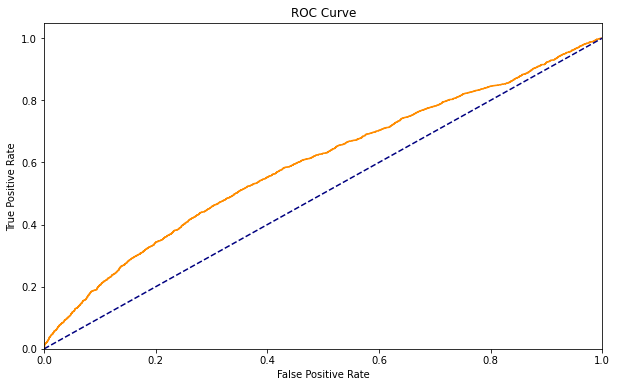

Brier Score:
1972.0496567899718


In [13]:
#Logistic Regression Model
lr = LogisticRegression(max_iter=10000)

evaluateModel(lr, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[11682     0]
 [    0 12333]]

                  precision    recall  f1-score   support

       False       1.00      1.00      1.00     11682
        True       1.00      1.00      1.00     12333

    accuracy                           1.00     24015
   macro avg       1.00      1.00      1.00     24015
weighted avg       1.00      1.00      1.00     24015

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[2495 1399]
 [1422 2689]]

                  precision    recall  f1-score   support

       False       0.64      0.64      0.64      3894
        True       0.66      0.65      0.66      4111

    accuracy                           0.65      8005
   macro avg       0.65      0.65      0.65      8005
weighted avg       0.65      0.65      0.65      8005

    

AUC for the Model Test Set: 0.6474140432979678


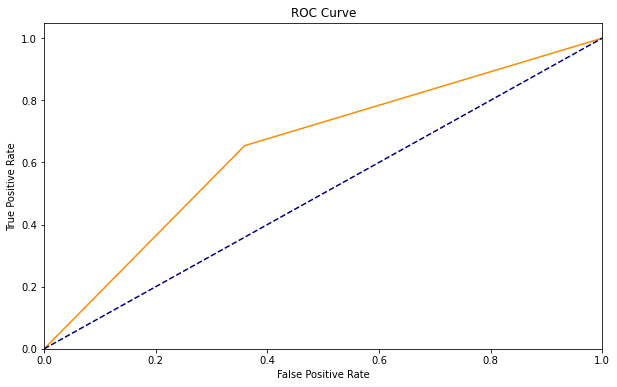

Brier Score:
2821.0


In [14]:
#Decision Tree Model
dt = DecisionTreeClassifier()

evaluateModel(dt, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[11681     1]
 [    0 12333]]

                  precision    recall  f1-score   support

       False       1.00      1.00      1.00     11682
        True       1.00      1.00      1.00     12333

    accuracy                           1.00     24015
   macro avg       1.00      1.00      1.00     24015
weighted avg       1.00      1.00      1.00     24015

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[2842 1052]
 [1175 2936]]

                  precision    recall  f1-score   support

       False       0.71      0.73      0.72      3894
        True       0.74      0.71      0.73      4111

    accuracy                           0.72      8005
   macro avg       0.72      0.72      0.72      8005
weighted avg       0.72      0.72      0.72      8005

    

AUC for the Model Test Set: 0.7992367552848115


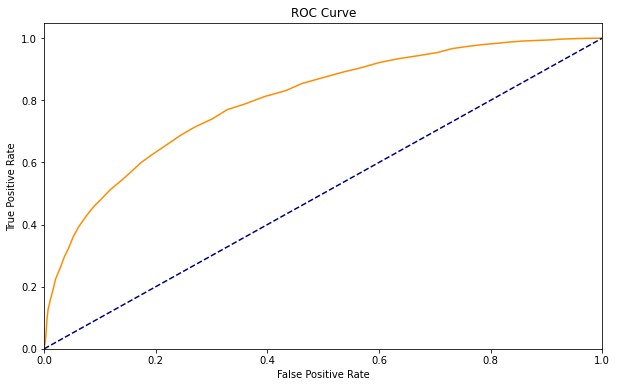

Brier Score:
1462.2344000000062


In [15]:
#Random Forest Model
rf = RandomForestClassifier(random_state=42, n_estimators=50)

evaluateModel(rf, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[7908 3774]
 [3393 8940]]

                  precision    recall  f1-score   support

       False       0.70      0.68      0.69     11682
        True       0.70      0.72      0.71     12333

    accuracy                           0.70     24015
   macro avg       0.70      0.70      0.70     24015
weighted avg       0.70      0.70      0.70     24015

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[2665 1229]
 [1152 2959]]

                  precision    recall  f1-score   support

       False       0.70      0.68      0.69      3894
        True       0.71      0.72      0.71      4111

    accuracy                           0.70      8005
   macro avg       0.70      0.70      0.70      8005
weighted avg       0.70      0.70      0.70      8005

    

AUC for the Model Test Set: 0.785084975644409


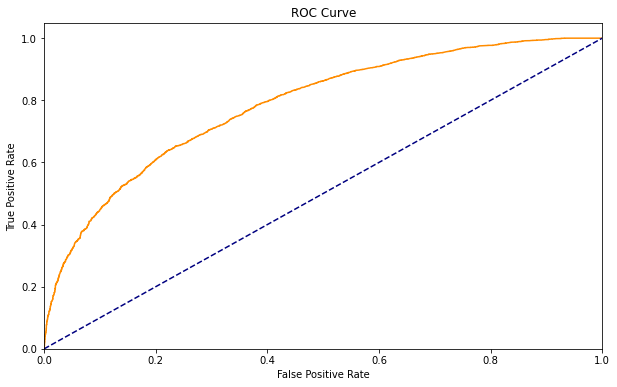

Brier Score:
1942.7391702823404


In [16]:
#AdaBoost Model
ada = AdaBoostClassifier(random_state=42)

evaluateModel(ada, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[9714 1968]
 [2353 9980]]

                  precision    recall  f1-score   support

       False       0.81      0.83      0.82     11682
        True       0.84      0.81      0.82     12333

    accuracy                           0.82     24015
   macro avg       0.82      0.82      0.82     24015
weighted avg       0.82      0.82      0.82     24015

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[2862 1032]
 [1153 2958]]

                  precision    recall  f1-score   support

       False       0.71      0.73      0.72      3894
        True       0.74      0.72      0.73      4111

    accuracy                           0.73      8005
   macro avg       0.73      0.73      0.73      8005
weighted avg       0.73      0.73      0.73      8005

    

AUC for the Model Test Set: 0.8119815090159227


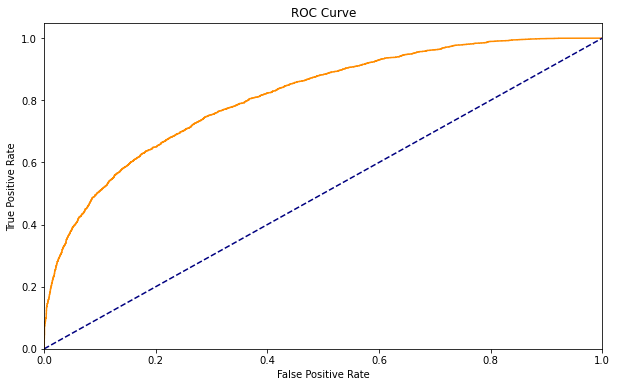

Brier Score:
1414.0036842032878


In [17]:
#XGB Model
xgb = XGBClassifier(random_state=42)

evaluateModel(xgb, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[9063 2619]
 [2973 9360]]

                  precision    recall  f1-score   support

       False       0.75      0.78      0.76     11682
        True       0.78      0.76      0.77     12333

    accuracy                           0.77     24015
   macro avg       0.77      0.77      0.77     24015
weighted avg       0.77      0.77      0.77     24015

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[2883 1011]
 [1126 2985]]

                  precision    recall  f1-score   support

       False       0.72      0.74      0.73      3894
        True       0.75      0.73      0.74      4111

    accuracy                           0.73      8005
   macro avg       0.73      0.73      0.73      8005
weighted avg       0.73      0.73      0.73      8005

    

AUC for the Model Test Set: 0.8177237726534982


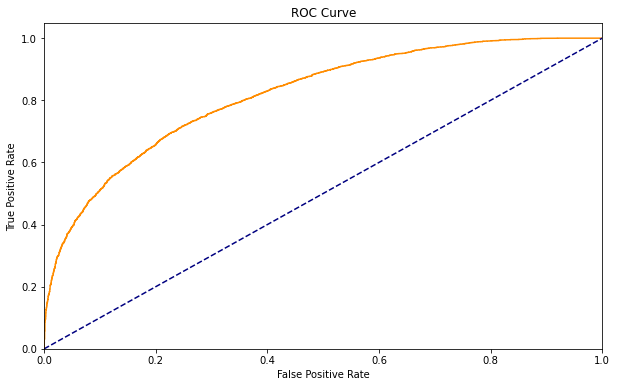

Brier Score:
1392.2315627278483


In [18]:
#lgb Model
lgb = LGBMClassifier(random_state=42)

evaluateModel(lgb, X_train, X_test, y_train, y_test)

In [19]:
#Features
features = df2.drop("is_good", axis=1).columns

imp = lgb.feature_importances_
pd.DataFrame(list(zip(features, imp)), columns=["Feature", "Importance"]).sort_values(by="Importance", ascending=False)

,Feature,Importance
4,vote_count,589
5,release_year,482
3,runtime,445
1,popularity,293
0,budget,196
2,revenue,140
6,release_month,132
13,genre_Documentary,52
40,production_country_United States of America,52
16,genre_Horror,50


In [20]:
import pickle

lgb_final = LGBMClassifier(random_state=42)
lgb_final.fit(X, y)

pickle.dump(lgb_final, open('movies_goodness.pkl', 'wb'))


In [21]:
df2.columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_count',
       'release_year', 'release_month', 'release_is_weekend', 'is_good',
       'genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Comedy',
       'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Fantasy',
       'genre_Horror', 'genre_Other', 'genre_Romance',
       'production_company_BBC Films', 'production_company_Columbia Pictures',
       'production_company_Lions Gate Films',
       'production_company_Metro-Goldwyn-Mayer (MGM)',
       'production_company_Mosfilm', 'production_company_New Line Cinema',
       'production_company_Other', 'production_company_Paramount Pictures',
       'production_company_RKO Radio Pictures',
       'production_company_Twentieth Century Fox Film Corporation',
       'production_company_United Artists',
       'production_company_Universal Pictures',
       'production_company_Walt Disney Pictures',
       'production_company_Warner Bros.', 'production_country_Ca

In [22]:
y = {}
for x in df2.columns: 
    y[x]=0
y

{'budget': 0,
 'popularity': 0,
 'revenue': 0,
 'runtime': 0,
 'vote_count': 0,
 'release_year': 0,
 'release_month': 0,
 'release_is_weekend': 0,
 'is_good': 0,
 'genre_Action': 0,
 'genre_Adventure': 0,
 'genre_Animation': 0,
 'genre_Comedy': 0,
 'genre_Crime': 0,
 'genre_Documentary': 0,
 'genre_Drama': 0,
 'genre_Fantasy': 0,
 'genre_Horror': 0,
 'genre_Other': 0,
 'genre_Romance': 0,
 'production_company_BBC Films': 0,
 'production_company_Columbia Pictures': 0,
 'production_company_Lions Gate Films': 0,
 'production_company_Metro-Goldwyn-Mayer (MGM)': 0,
 'production_company_Mosfilm': 0,
 'production_company_New Line Cinema': 0,
 'production_company_Other': 0,
 'production_company_Paramount Pictures': 0,
 'production_company_RKO Radio Pictures': 0,
 'production_company_Twentieth Century Fox Film Corporation': 0,
 'production_company_United Artists': 0,
 'production_company_Universal Pictures': 0,
 'production_company_Walt Disney Pictures': 0,
 'production_company_Warner Bros.': 0

In [23]:
inps = {'budget': 0,
 'popularity': 0,
 'revenue': 0,
 'runtime': 0,
 'vote_count': 0,
 'release_year': 0,
 'release_month': 0,
 'release_is_weekend': 0,
 'genre_Action': 0,
 'genre_Adventure': 0,
 'genre_Animation': 0,
 'genre_Comedy': 0,
 'genre_Crime': 0,
 'genre_Documentary': 0,
 'genre_Drama': 0,
 'genre_Fantasy': 0,
 'genre_Horror': 0,
 'genre_Other': 0,
 'genre_Romance': 0,
 'production_company_BBC Films': 0,
 'production_company_Columbia Pictures': 0,
 'production_company_Lions Gate Films': 0,
 'production_company_Metro-Goldwyn-Mayer (MGM)': 0,
 'production_company_Mosfilm': 0,
 'production_company_New Line Cinema': 0,
 'production_company_Other': 0,
 'production_company_Paramount Pictures': 0,
 'production_company_RKO Radio Pictures': 0,
 'production_company_Twentieth Century Fox Film Corporation': 0,
 'production_company_United Artists': 0,
 'production_company_Universal Pictures': 0,
 'production_company_Walt Disney Pictures': 0,
 'production_company_Warner Bros.': 0,
 'production_country_Canada': 0,
 'production_country_France': 0,
 'production_country_Germany': 0,
 'production_country_Italy': 0,
 'production_country_Japan': 0,
 'production_country_Other': 0,
 'production_country_United Kingdom': 0,
 'production_country_United States of America': 0,
 'spoken_language_Chinese': 0,
 'spoken_language_Deutsch': 0,
 'spoken_language_English': 0,
 'spoken_language_Español': 0,
 'spoken_language_Français': 0,
 'spoken_language_Italiano': 0,
 'spoken_language_Japanese': 0,
 'spoken_language_Other': 0,
 'spoken_language_Russian': 0}

# Movie model entry example

In [24]:
#Movie model example:
budget = 300000
popularity =20
revenue = 500000
runtime = 125
vote_count =700
release_year = 2020
release_month = 7
release_is_weekend =1
genre = 'Horror'
production_company = 'Columbia Pictures'
production_country = 'United States of America'
spoken_language = 'English'

#Numeric 
inps["budget"] = budget
inps["popularity"] = popularity
inps["revenue"] = revenue
inps["runtime"] = runtime
inps["vote_count"] = vote_count
inps["release_year"] = release_year
inps["release_is_weekend"] = release_is_weekend
inps["release_month"] = release_month
#
inps[f"genre_{genre}"] = 1
inps[f"production_company_{production_company}"] = 1
inps[f"production_country_{production_country}"] = 1
inps[f"spoken_language_{spoken_language}"] = 1


inps_df=pd.DataFrame([inps])

inps_df

,budget,popularity,revenue,runtime,vote_count,release_year,release_month,release_is_weekend,genre_Action,genre_Adventure,...,production_country_United States of America,spoken_language_Chinese,spoken_language_Deutsch,spoken_language_English,spoken_language_Español,spoken_language_Français,spoken_language_Italiano,spoken_language_Japanese,spoken_language_Other,spoken_language_Russian
0,300000,20,500000,125,700,2020,7,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [25]:
model = pickle.load(open('movies_goodness.pkl', 'rb'))

In [26]:
model.predict_proba(inps_df)

array([[0.07856744, 0.92143256]])